<h2>Load data</h2>

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

# load data
df = pd.read_csv('data/diabetes.csv')
np_data = df.values

# split data into X and y
X = np_data[:,0:-1]
# Convert class label strings to integers
Y_raw = np_data[:,-1]
encoder = LabelEncoder()
encoder.fit(Y_raw)
Y = encoder.transform(Y_raw)

# shuffle data
X, Y = shuffle(X, Y, random_state=0)

# set seed to randomizer
seed = 7

# Ignore deprecation warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

<h2>Function for evaluating model accuracy</h2>

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

def evaluate(model):
    print("-- Training data --")
    # train model on training dataset
    model.fit(X, Y)
    # evaluate dataset
    y_pred = model.predict(X)
    # calculate accuracy
    accuracy = accuracy_score(Y, y_pred)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    # confusion matrix
    print("Confusion Matrix:")
    conf_mx = confusion_matrix(Y, y_pred)
    print(conf_mx)
    
    print("")
    print("-- 10-fold CV --")
    # 10-fold CV
    y_pred = cross_val_predict(model, X, Y, cv=10)
    # calculate accuracy
    accuracy = accuracy_score(Y, y_pred)
    print("Average accuracy: %.2f%%" % (accuracy * 100.0))
    # confusion matrix
    print("Confusion Matrix:")
    conf_mx = confusion_matrix(Y, y_pred)
    print(conf_mx)

<h2>Linear classifier</h2>

In [8]:
from sklearn import linear_model

# train model
model = linear_model.SGDClassifier(max_iter=1000, random_state=seed, tol=1e-5)
evaluate(model)

-- Training data --
Accuracy: 60.03%
Confusion Matrix:
[[304 196]
 [111 157]]

-- 10-fold CV --
Average accuracy: 54.95%
Confusion Matrix:
[[305 195]
 [151 117]]


<h2>Neural Network classifier</h2>

In [9]:
from sklearn.neural_network import MLPClassifier

# train model
model = MLPClassifier(max_iter=1000, random_state=seed, solver='lbfgs')
evaluate(model)

-- Training data --
Accuracy: 85.55%
Confusion Matrix:
[[452  48]
 [ 63 205]]

-- 10-fold CV --
Average accuracy: 70.96%
Confusion Matrix:
[[397 103]
 [120 148]]


Adam optimizer works best for large datasets with many examples. On smaller datasets, sgd or lbfgs can give better results. It is clear that Adam doesn't work well for this dataset.

In [10]:
from sklearn.neural_network import MLPClassifier

# train model
model = MLPClassifier(max_iter=1000, random_state=seed, solver='adam')
evaluate(model)

-- Training data --
Accuracy: 74.48%
Confusion Matrix:
[[458  42]
 [154 114]]

-- 10-fold CV --
Average accuracy: 70.96%
Confusion Matrix:
[[408  92]
 [131 137]]


<h2>Decision Tree classifier</h2>

In [6]:
from sklearn.tree import DecisionTreeClassifier

# train model
model = DecisionTreeClassifier(min_samples_leaf=10, max_depth=8, random_state=seed)
evaluate(model)

-- Training data --
Accuracy: 85.03%
Confusion Matrix:
[[460  40]
 [ 75 193]]

-- 10-fold CV --
Average accuracy: 75.00%
Confusion Matrix:
[[421  79]
 [113 155]]


<h2>SVM classifier</h2>

In [7]:
from sklearn import svm

# train model
model = svm.SVC(random_state=seed)
evaluate(model)

-- Training data --
Accuracy: 100.00%
Confusion Matrix:
[[500   0]
 [  0 268]]

-- 10-fold CV --
Average accuracy: 65.10%
Confusion Matrix:
[[500   0]
 [268   0]]


<h2>kNN classifier</h2>

In [8]:
from sklearn.neighbors import KNeighborsClassifier

# train model
model = KNeighborsClassifier(n_neighbors=3)
evaluate(model)

-- Training data --
Accuracy: 85.94%
Confusion Matrix:
[[459  41]
 [ 67 201]]

-- 10-fold CV --
Average accuracy: 68.49%
Confusion Matrix:
[[379 121]
 [121 147]]


<h2>XGBoost classifier</h2>

In [9]:
from xgboost import XGBClassifier

# train model
model = XGBClassifier(random_state=seed)
evaluate(model)

-- Training data --
Accuracy: 87.24%
Confusion Matrix:
[[466  34]
 [ 64 204]]

-- 10-fold CV --
Average accuracy: 76.04%
Confusion Matrix:
[[421  79]
 [105 163]]


<h2>Plot attributes</h2>

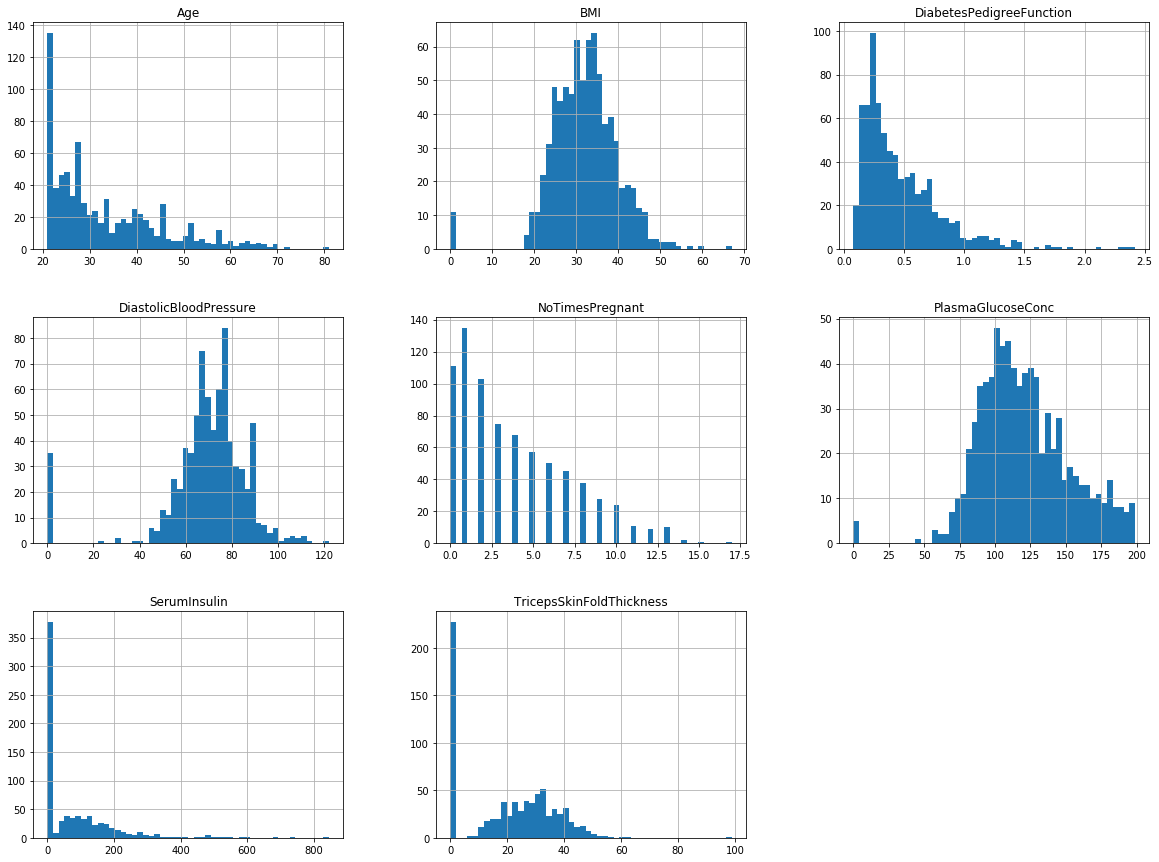

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()